Module 3b: Dimension Reduction using Principal Component Analysis, 
Charles Pang, PSUPR Semester 1 2021

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#Loading the dataset
data = pd.read_csv('LoanApplicant.csv')
features = list(data.columns.values)

#Print the first 5 rows of the dataframe.
data.head()

,Income,Education,Age,Residence,Employ,Savings,Debt,Credit cards
0,50000,16,28,2,2,5000,1200,2
1,72000,18,35,10,8,12000,5400,4
2,61000,18,36,6,5,15000,1000,2
3,88000,20,35,4,4,980,1100,4
4,91100,18,38,8,9,20000,0,1


# Summary Statistics

In [5]:
np.round(data.describe().transpose(),decimals=2)

,count,mean,std,min,25%,50%,75%,max
Income,30.0,48646.00,18505.45,21240.0,37055.00,41100.0,58125.00,91100.0
Education,30.0,15.27,2.13,12.0,14.00,16.0,16.00,20.0
Age,30.0,32.80,4.63,26.0,29.00,33.0,36.00,41.0
Residence,30.0,5.93,3.98,1.0,2.25,5.0,8.00,15.0
Employ,30.0,5.50,3.66,1.0,2.00,4.0,8.00,14.0
Savings,30.0,8319.33,8550.50,0.0,1950.00,4750.0,14050.00,34000.0
Debt,30.0,3812.00,5042.51,0.0,800.00,1200.0,6600.00,22000.0
Credit cards,30.0,2.87,1.25,1.0,2.00,2.5,3.75,6.0


# Frequency Distributions

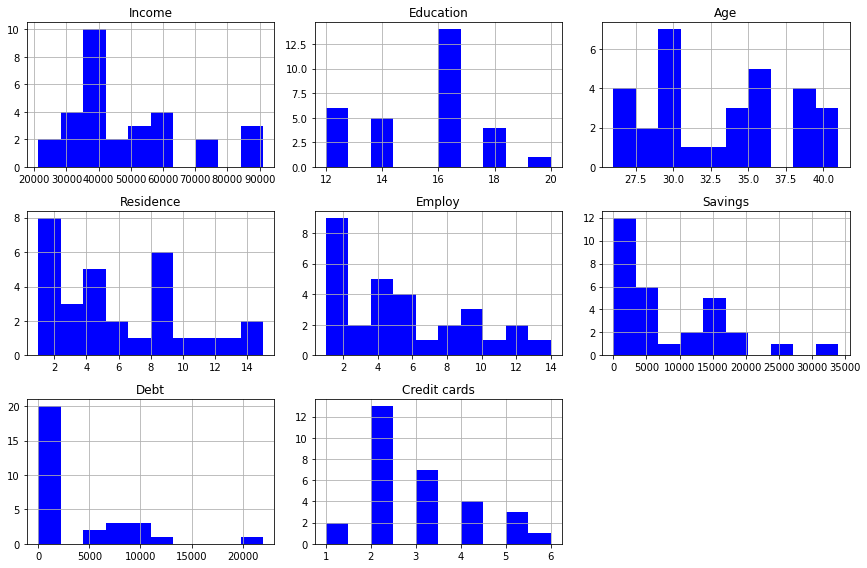

In [6]:
# Histograms
data.hist(grid=True, figsize=(12,8), color='blue')
plt.tight_layout()
plt.show()

# Correlation Matrix

In [7]:
# Correlation matrix (data is standardized by the formula)
colnames = features
corm = data.corr().values

display(pd.DataFrame(np.round(corm,decimals=2),index=colnames,columns=colnames))

,Income,Education,Age,Residence,Employ,Savings,Debt,Credit cards
Income,1.00,0.55,0.52,0.35,0.33,0.21,-0.20,-0.06
Education,0.55,1.00,0.23,0.11,0.05,0.45,-0.46,-0.30
Age,0.52,0.23,1.00,0.84,0.85,0.55,0.03,-0.13
Residence,0.35,0.11,0.84,1.00,0.95,0.57,0.19,0.05
Employ,0.33,0.05,0.85,0.95,1.00,0.54,0.25,0.02
Savings,0.21,0.45,0.55,0.57,0.54,1.00,-0.39,-0.41
Debt,-0.20,-0.46,0.03,0.19,0.25,-0.39,1.00,0.47
Credit cards,-0.06,-0.30,-0.13,0.05,0.02,-0.41,0.47,1.00


# Bartlett's Sphericity Test & KMO

In [8]:
# Please install the following package using the "Anaconda Prompt":
#   pip install factor_analyzer

In [11]:
# Check for significant correlations for Dimension Reduction to be fruitful
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(data)
if (p_value <0.05): print('Barlett Sphericity - Passed')
else: print('Barlett Sphericity - Failed!')

Barlett Sphericity - Passed


In [12]:
# Check for sampling adequacy
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(data)
print("\nKaiser-Meyer-Olkin:", kmo_model)
if (kmo_model > 0.5): print("KMO - Passed")
else: print('KMO - Failed!')


Kaiser-Meyer-Olkin: 0.6855653942535219
KMO - Passed


# Standardize Data

In [13]:
# Standardized the data
data_std = StandardScaler().fit_transform(data) #mean=0; var=1)$

# Apply the PCA method

In [14]:
# Run the PCA Method
n_components = len(features)
pca = PCA(n_components).fit(data_std)

In [15]:
# generate PC labels:
PCs=[]
for l in range(1,n_components+1):
    PCs.append("PC"+str(l))

# Obtain Eigenvectors

In [16]:
# get the eigenvectors
eigenvectors = np.round(pca.components_.transpose(),decimals=3)
display(pd.DataFrame(eigenvectors,index=colnames,columns=PCs))

# PC1 = Income*0.314 + Education*0.237 + Age*0.484 .... + Credit Cards*-0.123

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Income,0.314,-0.145,0.676,-0.347,0.241,-0.494,-0.018,-0.030
Education,0.237,-0.444,0.401,0.240,-0.622,0.357,-0.103,0.057
Age,0.484,0.135,0.004,-0.212,0.175,0.487,0.657,-0.052
Residence,0.466,0.277,-0.091,0.116,0.035,0.085,-0.487,-0.662
Employ,0.459,0.304,-0.122,-0.017,0.014,0.023,-0.368,0.739
Savings,0.404,-0.219,-0.366,0.436,-0.143,-0.568,0.348,-0.017
Debt,-0.067,0.585,0.078,-0.281,-0.681,-0.245,0.196,-0.075
Credit cards,-0.123,0.452,0.468,0.703,0.195,0.022,0.158,0.058


# Obtain Loading Matrix

In [17]:
# get eigenvalues to calculate the loadings
eigenvalues = pca.explained_variance_
loadings = eigenvectors * np.sqrt(eigenvalues)

display(pd.DataFrame(np.round(loadings,decimals=4),index=colnames,columns=PCs))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Income,0.6015,-0.2153,0.7028,-0.2573,0.1572,-0.2050,-0.0065,-0.0062
Education,0.4540,-0.6594,0.4169,0.1780,-0.4057,0.1482,-0.0371,0.0118
Age,0.9272,0.2005,0.0042,-0.1572,0.1141,0.2021,0.2366,-0.0107
Residence,0.8927,0.4114,-0.0946,0.0860,0.0228,0.0353,-0.1754,-0.1366
Employ,0.8793,0.4515,-0.1268,-0.0126,0.0091,0.0095,-0.1325,0.1525
Savings,0.7739,-0.3252,-0.3805,0.3233,-0.0933,-0.2357,0.1253,-0.0035
Debt,-0.1284,0.8688,0.0811,-0.2084,-0.4442,-0.1017,0.0706,-0.0155
Credit cards,-0.2356,0.6713,0.4865,0.5213,0.1272,0.0091,0.0569,0.0120


# Loadings Plot

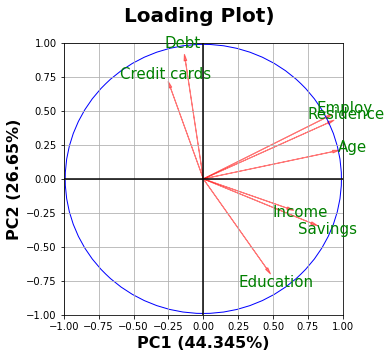

In [18]:
# Loadings Plot
p1=1; p2=2
coeff = loadings[:,p1-1:p2]
var_expln = np.round(pca.explained_variance_ratio_ * 100,decimals=3)

fig = plt.figure(figsize=(5,5))
plt.xlim(-1,1)
plt.ylim(-1,1)
fig.suptitle('Loading Plot)',fontsize=20,weight='bold')
plt.xlabel('PC'+str(p1)+' ('+str(var_expln[p1-1])+'%)',fontsize=16,weight='bold')
plt.ylabel('PC'+str(p2)+' ('+str(var_expln[p2-1])+'%)',fontsize=16,weight='bold')

for i in range(len(coeff[:,0])):
    plt.arrow(0,0,coeff[i,0],coeff[i,1],color='r',
              alpha=0.5,head_width=0.02, head_length=0.05)
    plt.text(coeff[i,0]*1.15,coeff[i,1]*1.15,features[i],fontsize=15,
             color='g',ha='center',va='center')

circle = plt.Circle((0, 0), 0.99,  color='b', fill=False)
ax = fig.gca(); ax.add_artist(circle)
plt.axhline(0, color='black'); plt.axvline(0, color='black')
plt.grid()
plt.show()

# Obtain Eigenvalues & Variance Explained

In [19]:
npc = 6 # display
print('Eigenvalues         :',np.round(eigenvalues[0:npc],decimals=3))
print('% Variance Explained:',var_expln[0:npc])
print('% Cumulative)       :',np.cumsum(var_expln[0:npc]))

Eigenvalues         : [3.67  2.206 1.081 0.55  0.425 0.172]
% Variance Explained: [44.345 26.65  13.059  6.644  5.14   2.081]
% Cumulative)       : [44.345 70.995 84.054 90.698 95.838 97.919]


# Pareto Chart

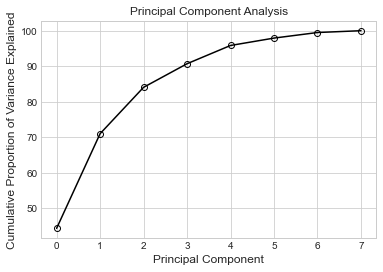

In [20]:
# pareto chart
plt.style.use('seaborn-whitegrid')
cumulative_var = np.cumsum(var_expln)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)
plt.show()

# Scree Plot

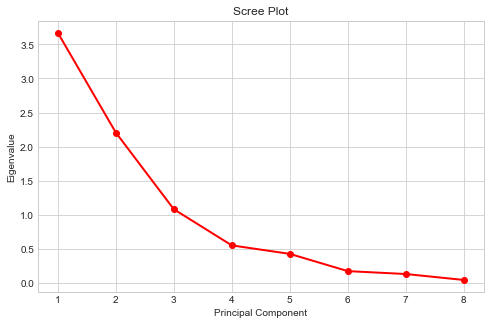

In [21]:
## scree plot
fig = plt.figure(figsize=(8,5))
x_axis = np.arange(n_components) + 1

plt.plot(x_axis, eigenvalues, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

# Compute Communalites

In [22]:
# compute the communilaties for the selected number of PC
no_pc = 4 

loadings_sq = loadings*loadings #square matrix
communality = np.sum(loadings_sq[:,0:no_pc],axis=1).tolist()
print(pd.DataFrame(communality,index=colnames))

                     0
Income        0.968296
Education     0.846378
Age           0.924620
Residence     0.982515
Employ        0.993247
Savings       0.954061
Debt          0.821247
Credit cards  1.014565


# Score Plot

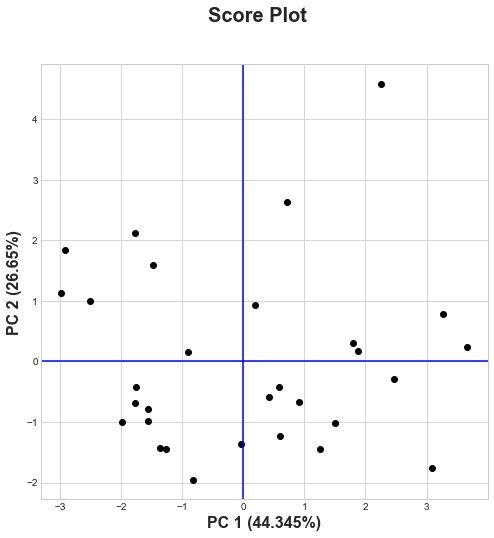

In [23]:
# Score Plot - scatterplot of new dataset with PC1 and PC2 
fig = plt.figure(figsize=(8,8))
fig.suptitle('Score Plot',fontsize=20,weight='bold')

plt.xlabel('PC 1 ('+str(var_expln[0])+'%)',fontsize=16,weight='bold')
plt.ylabel('PC 2 ('+str(var_expln[1])+'%)',fontsize=16,weight='bold')
plt.axhline(0, color='blue'); plt.axvline(0, color='blue')

new_reduced_dataset = pca.transform(data_std) # used for downstream analytics
plt.scatter(new_reduced_dataset[:,0],new_reduced_dataset[:,1],color='black')
plt.show(); fig.savefig('ScorePlot.jpg')

# Compute the Component Scores (for downstream use)

In [24]:
# Print out the Component Scores
PC_scores = pca.fit_transform(data_std) # PC scores for downstream analytics

scores = pd.DataFrame(PC_scores[:,0:no_pc],columns=PCs[0:no_pc])
scores.head(10)
#scores_matrix.to_csv("PrincipalComponents.csv")

,PC1,PC2,PC3,PC4
0,-1.356145,-1.422152,0.169596,-0.337685
1,1.790714,0.306738,1.508913,0.621809
2,1.252730,-1.443638,0.334810,-0.056943
3,0.597244,-1.226393,3.172501,0.059572
4,3.086463,-1.759539,0.659380,-0.939320
5,2.258250,4.576150,0.046110,-0.843019
6,-1.469670,1.590170,0.526923,0.885788
7,0.186354,0.925404,-0.924450,-0.096049
8,0.913751,-0.676040,-1.107618,0.514616
9,-0.816324,-1.949886,-1.367173,-0.051855
